# Stathub 2.0 - Premier League Prediction

2) Prediction Model Creation

In [1]:
#imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
data = pd.read_csv("PremDataProcessed.csv")

Mean Absolute Error: 2.9811206988037733


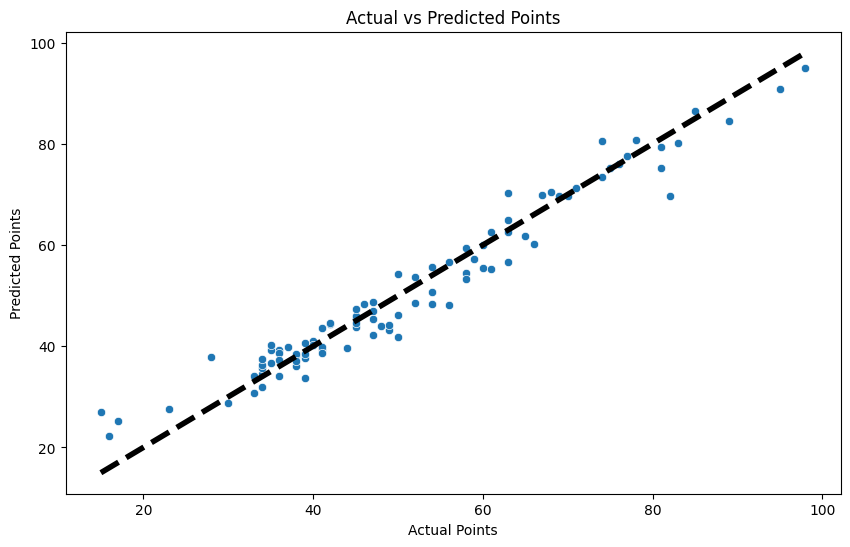

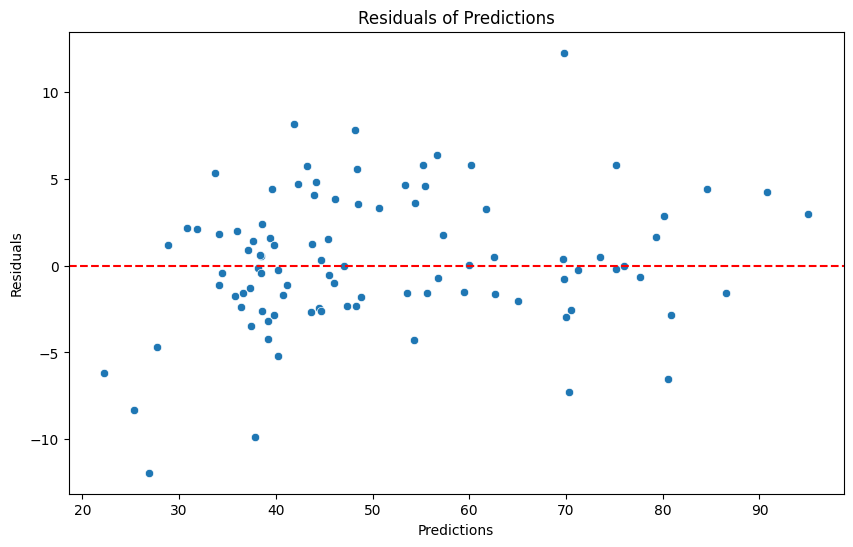

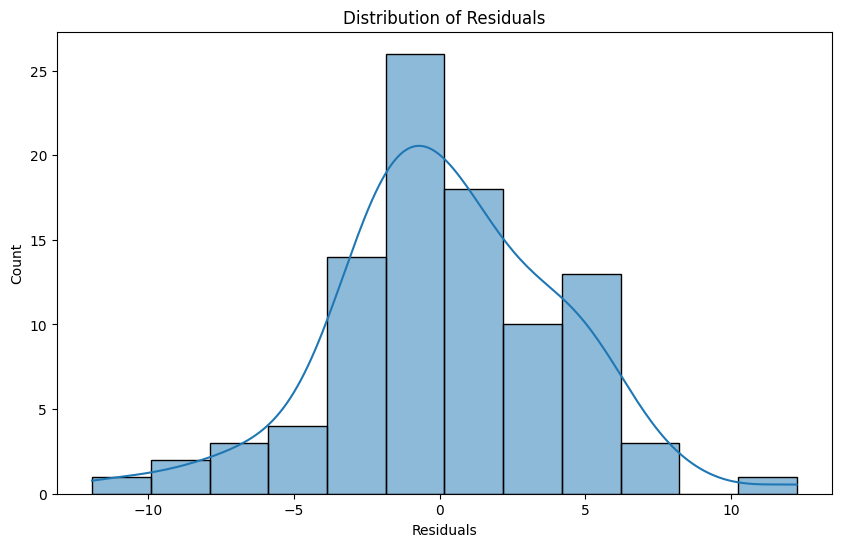

In [4]:
# Selecting the features and target variable
features = ['Goal_Difference', 'Normalized_Average_Market_Value']
X = data[features]
y = data['Points']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Creating the model
multi_lin_reg_model = LinearRegression()

# Fitting the model
multi_lin_reg_model.fit(X_train, y_train)

# Making predictions
predictions = multi_lin_reg_model.predict(X_test)

# Calculating the MAE
mae = metrics.mean_absolute_error(y_test, predictions)

# Displaying the metrics
print(f"Mean Absolute Error: {mae}")

# Visualization
# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=predictions)
plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.title('Actual vs Predicted Points')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.show()

# Residuals plot
residuals = y_test - predictions
plt.figure(figsize=(10, 6))
sns.scatterplot(x=predictions, y=residuals)
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals of Predictions')
plt.show()

# Distribution of Residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

Now we are able to generate a model which predicts the number of points a team will achieve in the Premier League when given its GD and normalized average market value for that year. It has a MAE of 2.98 which means the average prediction is 2.98 points off. Additionally, the graph of the residuals is approximately randomly distributed which means that the variation in the model is due to randomness and there is not another underlying trend that is not yet captured.

In [89]:
teams_gd_namv_df = pd.DataFrame({'Team': teams_22, 'GD_Namv_Predictions': gd_namv_predictions})
teams_gd_namv_df

,Team,GD_Namv_Predictions
0,manchester city,58.0
1,liverpool fc,31.0
2,chelsea fc,27.0
3,manchester united,31.0
4,tottenham hotspur,21.0
5,arsenal fc,12.0
6,leicester city,14.0
7,aston villa,20.0
8,everton fc,-6.0
9,wolverhampton wanderers,1.0


Each GD was off by an average of 11 goals. This is not good enough.

Review:  
Lets compare the two methods of GD Predictions

--

In [ ]:
##MAY NEED FOR LATER
data2023 = pd.read_csv("2023PremData.csv")
data2023 = data2023[["Team", "Average_Market_Value"]]
for i in range(20):
    data2023["Average_Market_Value"][i] /= 57.74
data2023.rename(columns={"Average_Market_Value": "Normalized_Average_Market_Value"}, inplace=True)
data2023
##
teams = ['manchester city', 'arsenal fc', 'chelsea fc', 'liverpool fc', 'tottenham hotspur', 'manchester united', 'aston villa', 'newcastle united', 'brighton & hove albion', 'west ham united', 'brentford fc', 'crystal palace', 'nottingham forest', 'afc bournemouth', 'everton fc', 'wolverhampton wanderers', 'fulham fc', 'burnley fc', 'sheffield united', 'luton town']

## 4a - Lets Predict!

Lets predict the results of the 2023/24 Premier League season using:  
1) GD predicted only with year as input   
2) Normalized Average Market Value
  
and also using 
1) GD predicted only with normalized average market value as input   
2) Normalized Average Market Value

In [183]:
data2023 = pd.read_csv("2023PremData.csv")
data2023 = data2023[["Team", "Average_Market_Value"]]
for i in range(20):
    data2023["Average_Market_Value"][i] /= 57.74
data2023.rename(columns={"Average_Market_Value": "Normalized_Average_Market_Value"}, inplace=True)

data2023["Predicted_GD_Year"] = gd_comparison_df["gd_year_predictions"]
data2023["Predicted_GD_Namv"] = gd_comparison_df["gd_namv_predictions"]
data2023

,Team,Normalized_Average_Market_Value,Predicted_GD_Year,Predicted_GD_Namv
0,manchester city,1.000000,63.923633,59.134974
1,arsenal fc,0.774853,20.056760,32.044462
2,chelsea fc,0.535850,19.270382,27.800453
3,liverpool fc,0.569969,54.533540,25.645230
4,tottenham hotspur,0.517839,23.006192,14.040029
5,manchester united,0.470904,23.472652,26.384668
6,aston villa,0.414444,3.954529,2.151896
7,newcastle united,0.394527,-15.572108,8.712751
8,brighton & hove albion,0.324039,15.266667,2.392932
9,west ham united,0.351576,-6.323465,-7.215791


In [187]:
predictions_with_gd_year = []
predictions_with_gd_namv = []

for i in range(20):
    gd_year = [data2023["Predicted_GD_Year"][i]]
    gd_namv = [data2023["Predicted_GD_Namv"][i]]
    namv = [data2023["Normalized_Average_Market_Value"][i]]
    
    new_data_year = pd.DataFrame({'Goal_Difference': gd_year, 'Normalized_Average_Market_Value': namv})
    new_data_namv = pd.DataFrame({'Goal_Difference': gd_namv, 'Normalized_Average_Market_Value': namv})
    
    new_prediction_year = multi_lin_reg_model.predict(new_data_year)
    new_prediction_namv = multi_lin_reg_model.predict(new_data_namv)

    predictions_with_gd_year.append(new_prediction_year[0])
    predictions_with_gd_namv.append(new_prediction_namv[0])
    
data2023["Predicted_Points_With_GD_Year"] = predictions_with_gd_year
data2023["Predicted_Points_With_GD_Namv"] = predictions_with_gd_namv

In [192]:
#data2023 = data2023.sort_values(by="Predicted_Points_With_GD_Year", ascending=False)
data2023
predictions_gd_year = data2023.drop(columns=["Predicted_GD_Namv", "Predicted_Points_With_GD_Namv"])
predictions_gd_namv = data2023.drop(columns=["Predicted_GD_Year", "Predicted_Points_With_GD_Year"])

In [196]:
predictions_gd_year = predictions_gd_year.sort_values(by="Predicted_Points_With_GD_Year", ascending=False)
predictions_gd_year

,Team,Normalized_Average_Market_Value,Predicted_GD_Year,Predicted_Points_With_GD_Year
0,manchester city,1.000000,63.923633,93.941563
3,liverpool fc,0.569969,54.533540,81.069026
1,arsenal fc,0.774853,20.056760,69.390410
4,tottenham hotspur,0.517839,23.006192,65.612045
5,manchester united,0.470904,23.472652,64.889068
2,chelsea fc,0.535850,19.270382,64.263019
8,brighton & hove albion,0.324039,15.266667,58.206804
6,aston villa,0.414444,3.954529,54.837377
15,wolverhampton wanderers,0.245237,8.447368,53.516437
9,west ham united,0.351576,-6.323465,48.883246


In [198]:
predictions_gd_namv = predictions_gd_namv.sort_values(by="Predicted_Points_With_GD_Namv", ascending=False)
predictions_gd_namv

,Team,Normalized_Average_Market_Value,Predicted_GD_Namv,Predicted_Points_With_GD_Namv
0,manchester city,1.000000,59.134974,91.751771
1,arsenal fc,0.774853,32.044462,74.872231
2,chelsea fc,0.535850,27.800453,68.163710
3,liverpool fc,0.569969,25.645230,67.858774
5,manchester united,0.470904,26.384668,66.220695
4,tottenham hotspur,0.517839,14.040029,61.511934
7,newcastle united,0.394527,8.712751,56.615935
6,aston villa,0.414444,2.151896,54.013056
8,brighton & hove albion,0.324039,2.392932,52.319810
9,west ham united,0.351576,-7.215791,48.475197
